# Exploración de filtros espaciales y morfológicos en escenarios reales


<br><br><br>
Abajo del todo hay una funcion que centraliza todo el pipeline de mejora, todo lo que hay por encima es la definicion de las funciones necesarias y pruebas y demás. Lo importante es lo que esta en el pipeline. <br>
Tambien recomiendo mirar las funciones de mostrar las imagenes en el segundo bloque de codigo, Ahorran trabajo
<br><br><br>



## Operaciones de filtrado espacial disponibles
- Filtros paso Alto -> Resaltan variaciones bruscas de intensidad 
    - Derivada de primer orden. Produce bordes mas gruesos en la imagen resultante (detalles finos)
    - Derivada de segundo orden. Produce bordes mas finos (Cambios en escalon)
    
    (De esto no estoy seguro)
    Esto funciona como el analisis de funciones en matematicas, la primera derivada es la pendiente y la segunda los maximos y los minimos, osea la primera derivada resalta las zonas donde el valor de la intensidad esta cambiando hacia cualquier direccion y la segunda derivada resalta los bordes si a parte de haber cambios de intensidad en los pixeles de alrededor estos pixeles cambian con diferentes intensidades.

- Filtros paso bajo -> Suavizado de la imagen, atenuan las variaciones bruscas de intensidad
- Filtros de deteccion de bordes. Basado en el calculo de gradiente 
    - Operador de Roberts
    - Operadores de Prewitt 
    - Operadores de Sobel
    - Algoritmo de Canny (De los mas efectivos).

## Configuracion del codigo,  carga de las imagenes y funciones basicas para comparar

In [120]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

print ("Bibliotecas importadas correctamente")

imagenes_rgb = [
    cv2.imread('barco1.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco2.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco3.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco4.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco5.jpg', cv2.IMREAD_COLOR)
]

print ("Imagenes Cargadas en color")

imagenes_grey = [
    cv2.imread('barco1.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco2.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco3.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco4.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco5.jpg',  cv2.IMREAD_GRAYSCALE),
]

print ("Imagenes Cargadas en b&n")




Bibliotecas importadas correctamente
Imagenes Cargadas en color
Imagenes Cargadas en b&n


Funciones para mostrar las imagenes.

In [121]:
def mostrar_imagen(imagen, titulo):
    # Convertir la imagen de BGR (OpenCV) a RGB (Matplotlib)
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8, 8))
    plt.imshow(imagen_rgb)
    plt.title(titulo)
    plt.axis('off')
    plt.show()
    
def comparar_imagenes(imagen1, titulo1, imagen2, titulo2):

    imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
    imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 2, 1) 
    plt.imshow(imagen1_rgb)
    plt.title(titulo1)
    plt.axis('off')
        
    plt.subplot(1, 2, 2) 
    plt.imshow(imagen2_rgb)
    plt.title(titulo2)
    plt.axis('off')
    
    plt.tight_layout()
    plt.show()

def comparar_tres_imagenes(imagen1, titulo1, imagen2, titulo2, imagen3, titulo3):

    # Convertir las imágenes de BGR a RGB para Matplotlib
    imagen1_rgb = cv2.cvtColor(imagen1, cv2.COLOR_BGR2RGB)
    imagen2_rgb = cv2.cvtColor(imagen2, cv2.COLOR_BGR2RGB)
    imagen3_rgb = cv2.cvtColor(imagen3, cv2.COLOR_BGR2RGB)
    
    # Crear la figura
    plt.figure(figsize=(18, 6))  # Ajustar tamaño para que entren las tres imágenes
    
    # Mostrar la primera imagen
    plt.subplot(1, 3, 1)  # 1 fila, 3 columnas, posición 1
    plt.imshow(imagen1_rgb)
    plt.title(titulo1)
    plt.axis('off')
    
    # Mostrar la segunda imagen
    plt.subplot(1, 3, 2)  # 1 fila, 3 columnas, posición 2
    plt.imshow(imagen2_rgb)
    plt.title(titulo2)
    plt.axis('off')
    
    # Mostrar la tercera imagen
    plt.subplot(1, 3, 3)  # 1 fila, 3 columnas, posición 3
    plt.imshow(imagen3_rgb)
    plt.title(titulo3)
    plt.axis('off')
    
    # Mostrar el resultado
    plt.tight_layout()
    plt.show()


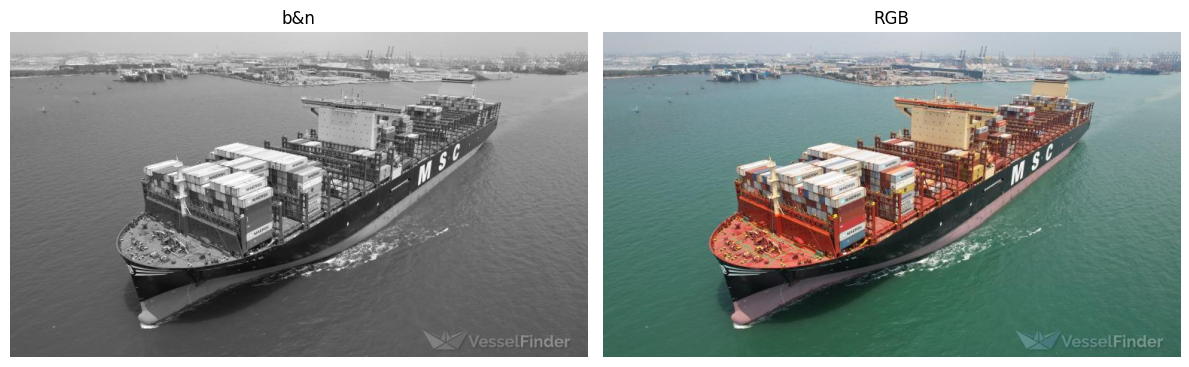

In [122]:
## Comprobar que las imagenes estam bien cargadas
comparar_imagenes(imagenes_grey[0],"b&n",imagenes_rgb[0], "RGB")

Filtro pasa bajas para suavizar la imagen y eliminar los pequeños cambios de contraste, con esto buscamos que no se detecten los bordes de los contenedores, naves industriales de fondo y demas objetos irrelevantes. 
<br>
Tamaño de kernel > filtrado mas potente a mas tamaño de kernel, esto tambien se puede hacer con el sigma en el gaussiano<br>
Kernel Gaussiano > Da mas peso a los puntos centrales del kernes, conserva mejor los detalles mientras reduce el riudo y los detalles mas leves<br>

#### **Filtro Promedio Simple **

El filtro **Promedio Simple** es un filtro de suavizado básico que toma el valor promedio de los píxeles dentro de un vecindario definido por un kernel de 3x3. Este filtro ayuda a reducir el ruido en la imagen, pero también puede suavizar los detalles importantes.

- **Características:**
  - **Kernel 3x3 o 7x7:** El kernel tiene un tamaño de 3x3 o 7x7, y todos los valores son iguales, lo que significa que el valor de cada píxel en la imagen de salida será el promedio de los 9 píxeles vecinos en la imagen original.
  - **Reducción de ruido:** Suaviza la imagen y reduce el ruido, pero también puede hacer que los bordes y los detalles finos se difuminen.
  - **Filtro básico:** Es un filtro sencillo y rápido, pero no tan efectivo para eliminar el ruido complejo o para preservar bordes nítidos.



#### **Filtro Gaussiano Débil (3x3, sigma=1)**

El **Filtro Gaussiano Débil** es un filtro de suavizado basado en una distribución gaussiana con un pequeño valor de sigma. Este filtro se utiliza para suavizar la imagen de manera moderada, reduciendo el ruido mientras preserva los bordes más nítidos.

- **Características:**
 
  - **Tamaño del kernel:** Cuanto mayor es el tamaño del kernel, más amplio es el área de suavizado, lo que resulta en un mayor desenfoque y pérdida de detalles.

  - **Kernel pequeño (3x3):** Suavizado moderado, mejor preservación de detalles y bordes.
  - **Kernel grande (7x7 o más):** Suavizado más fuerte, pero más difuso, lo que puede hacer que la imagen pierda detalles y bordes.

  - **Sigma:** Un valor bajo de sigma produce un suavizado más leve y centrado en los píxeles cercanos, mientras que un valor alto de sigma produce un suavizado más fuerte y extenso.
  - **Sigma bajo (1 o 2):** Suavizado moderado, preserva detalles y bordes finos.
  - **Sigma alto (10 o más):** Suavizado fuerte, elimina el ruido pero difumina detalles y bordes.


  - **Preservación de bordes:** Al ser un filtro más suave, es más adecuado para imágenes donde se desea reducir el ruido sin perder mucho contraste en los bordes.
  
  

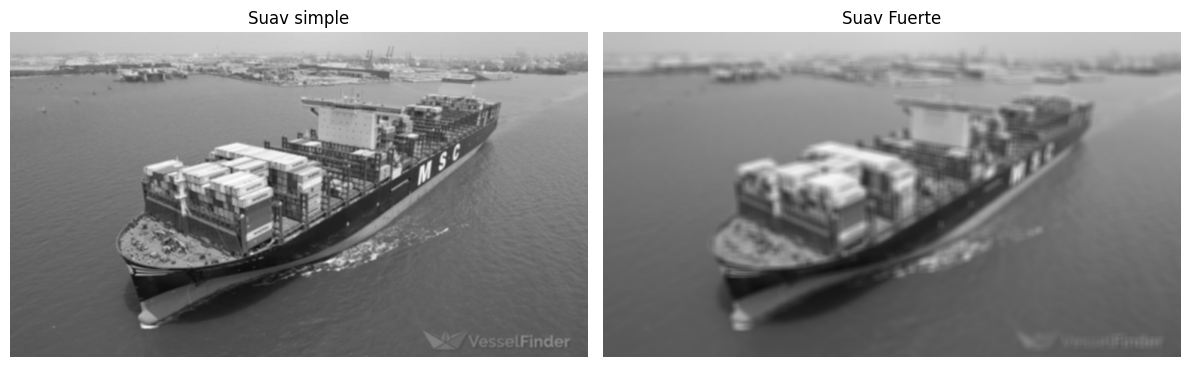

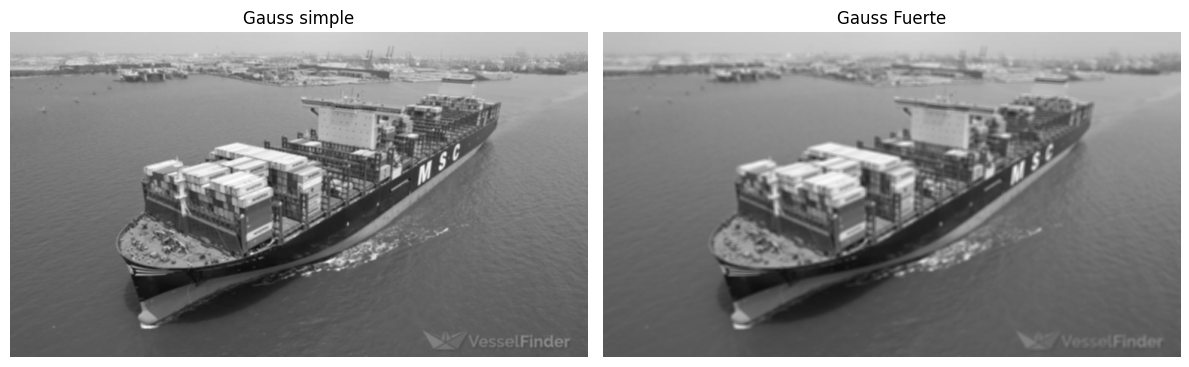

In [227]:
# Función para aplicar el filtro pasabaja
def aplicar_filtro_pasabaja(imagen, kernel):
    """
    Aplica un filtro pasabaja a la imagen usando un kernel proporcionado.

    :param imagen: Imagen de entrada (en escala de grises).
    :param kernel: Kernel para el filtro.
    :return: Imagen filtrada.
    """
    imagen_filtrada = cv2.filter2D(imagen, -1, kernel)
    return imagen_filtrada

# Definición de kernels pasabaja
kernels_pasabaja = {
    "suavizado_simple": np.ones((3, 3), dtype=np.float32) / 9,  # Kernel promedio simple 3x3
    "suavizado_mas_potente": np.ones((9, 9), dtype=np.float32) / 81,  # Kernel promedio 5x5 (más potente)
    "gaussiano_debil": cv2.getGaussianKernel(3, 1).dot(cv2.getGaussianKernel(3, 1).T),  # Gaussiano 3x3, sigma=1
    "gaussiano_fuerte": cv2.getGaussianKernel(5, 5).dot(cv2.getGaussianKernel(5, 5).T),  # Gaussiano 5x5, sigma=1.5
}

# Lista para almacenar las imágenes procesadas
imagenesSuavizadas = []
imagenProcesar = 0

# Iterar sobre los kernels y las imágenes
i = 0
for nombre_kernel, kernel in kernels_pasabaja.items():
    # Asegurarse de que no exceda el número de imágenes disponibles
    if i < len(imagenes_grey):
        imagen_filtrada = aplicar_filtro_pasabaja(imagenes_grey[imagenProcesar], kernel)
        imagenesSuavizadas.append(imagen_filtrada)  # Agregar la imagen filtrada a la lista
        i += 1

# Comparar imágenes
comparar_imagenes(imagenesSuavizadas[0], "Suav simple", imagenesSuavizadas[1], "Suav Fuerte")
comparar_imagenes(imagenesSuavizadas[2], "Gauss simple", imagenesSuavizadas[3], "Gauss Fuerte")



#### **Filtro Canny**

La detección de bordes **Canny** es un algoritmo popular para detectar bordes fuertes en imágenes. El proceso incluye varias etapas: suavizado de la imagen para reducir el ruido, detección de gradientes, y histeresis para decidir qué bordes son importantes.

- **Características:**
  - **Suavizado (Gaussian Blur):** Se aplica un filtro gaussiano para reducir el ruido y suavizar la imagen antes de la detección de bordes.
  - **Detección de bordes:** Se calculan los gradientes de la imagen y se usan dos umbrales para clasificar los bordes en fuertes y débiles. Los bordes débiles se mantienen solo si están conectados a bordes fuertes.
  - **Histeresis:** Asegura que solo los bordes importantes (conectados a bordes fuertes) sean retenidos.

#### **Filtro Sobel**
El filtro **Sobel** es un operador de gradiente utilizado para detectar bordes en una imagen mediante el cálculo de la derivada de la intensidad de los píxeles en las direcciones **horizontal** y **vertical**. Este filtro utiliza dos kernels de convolución para detectar bordes en las direcciones X y Y.

- **Características:**
  - **Gradientes en X y Y:** El filtro Sobel calcula los gradientes en las direcciones horizontal (X) y vertical (Y) de la imagen. Estos gradientes se obtienen utilizando dos kernels de 3x3.
  - **Magnitud del gradiente:** Se calcula la magnitud del gradiente combinando los gradientes en las direcciones X e Y, lo que resalta las áreas con cambios significativos en la intensidad de los píxeles, es decir, los bordes.
  - **Sensibilidad a bordes horizontales y verticales:** El filtro Sobel es sensible a bordes en ambas direcciones (horizontal y vertical), pero la intensidad de los bordes detectados varía dependiendo de la dirección del gradiente.
  - **Visualización:** Después de calcular la magnitud del gradiente, los valores se normalizan a un rango adecuado (0-255) para facilitar su visualización.
  

#### **Filtro Prewitt**

El filtro **Prewitt** es un operador de gradiente similar al filtro Sobel, pero utiliza una máscara de convolución diferente. Este filtro se utiliza para detectar bordes en las direcciones **horizontal** y **vertical**, y es especialmente útil para resaltar bordes con un cambio más gradual de intensidad en comparación con Sobel.

- **Características:**
  - **Kernels Prewitt:** El filtro utiliza dos kernels de 3x3 para calcular los gradientes en las direcciones horizontal (X) y vertical (Y). Estos kernels son similares a los de Sobel, pero con valores diferentes.
  - **Magnitud del gradiente:** Como en el filtro Sobel, se calcula la magnitud del gradiente combinando los gradientes en las direcciones X e Y, lo que resalta los bordes presentes en la imagen.
  - **Bordes más suaves:** Debido a los valores más pequeños de los kernels, los bordes detectados con Prewitt suelen ser más suaves en comparación con Sobel.
  - **Detección de bordes en ambas direcciones:** El filtro Prewitt detecta bordes en las direcciones horizontal y vertical, pero con un énfasis ligeramente diferente en la detección de bordes más amplios o menos pronunciados.

#### **Filtro Roberts**

El filtro **Roberts** es un operador de gradiente basado en una máscara de 2x2 que calcula el gradiente de la imagen a lo largo de las **diagonales**. Este filtro es muy sensible a los bordes finos y es ideal para detectar pequeños cambios en las imágenes.

- **Características:**
  - **Máscara 2x2:** A diferencia de otros filtros que utilizan kernels más grandes, Roberts usa una máscara de 2x2 para detectar cambios de intensidad en las direcciones diagonales de la imagen.
  - **Gradientes diagonales:** Calcula el gradiente a lo largo de las diagonales de la imagen, lo que lo hace especialmente adecuado para detectar bordes que no son horizontales o verticales, sino en ángulos.
  - **Sensibilidad a bordes finos:** Dado que utiliza una máscara pequeña, el filtro Roberts es muy sensible a bordes finos y pequeños detalles en la imagen.
  - **Alta resolución de bordes:** Es particularmente útil cuando se necesita una detección de bordes muy detallada y precisa, ya que resalta pequeños cambios en la intensidad.


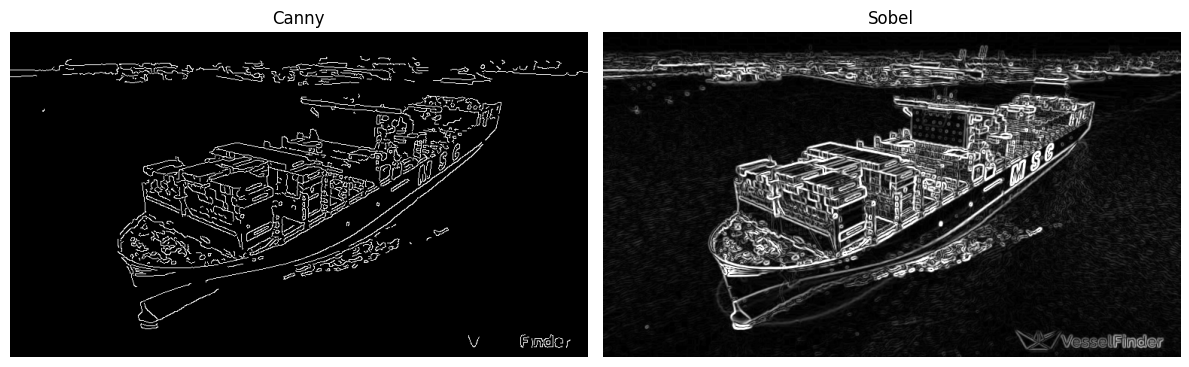

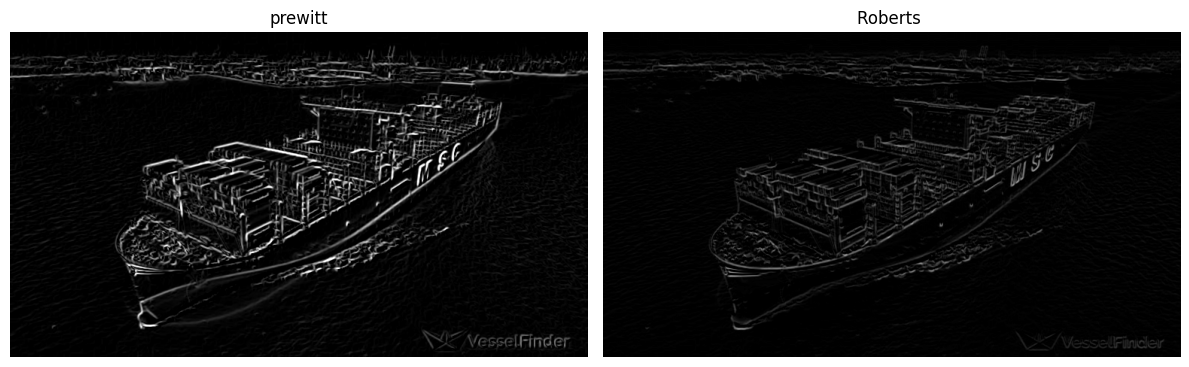

In [228]:

def deteccion_canny(imagen):
    """
    Aplica la detección de bordes Canny a una imagen.
    
    :param imagen: Imagen de entrada (en escala de grises).
    :return: Imagen binaria con bordes detectados.
    """
    # Suavizado para reducir el ruido
    imagen_suavizada = cv2.GaussianBlur(imagen, (5, 5), 1)
    # Detección de bordes Canny con umbrales predefinidos
    bordes_canny = cv2.Canny(imagen_suavizada, 80, 120)
    return bordes_canny

def deteccion_sobel(imagen):
    """
    Aplica la detección de bordes Sobel a una imagen.
    
    :param imagen: Imagen de entrada (en escala de grises).
    :return: Imagen con la magnitud del gradiente.
    """
    # Gradientes en X e Y
    gradiente_x = cv2.Sobel(imagen, cv2.CV_64F, 1, 0, ksize=3)  # Derivada en X
    gradiente_y = cv2.Sobel(imagen, cv2.CV_64F, 0, 1, ksize=3)  # Derivada en Y
    # Magnitud del gradiente
    magnitud_gradiente = cv2.magnitude(gradiente_x, gradiente_y)
    # Normalización a rango [0, 255] para visualización
    magnitud_gradiente = cv2.convertScaleAbs(magnitud_gradiente)
    return magnitud_gradiente


def deteccion_prewitt(imagen):
    # Asegurarse de que la imagen está en escala de grises
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    kernel_prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    kernel_prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    
    gradiente_x = cv2.filter2D(imagen, -1, kernel_prewitt_x)
    gradiente_y = cv2.filter2D(imagen, -1, kernel_prewitt_y)
    
    # Asegurarse de que ambos gradientes tienen el mismo tipo y tamaño
    gradiente_x = gradiente_x.astype(np.float32)
    gradiente_y = gradiente_y.astype(np.float32)
    
    magnitud_gradiente = cv2.magnitude(gradiente_x, gradiente_y)
    magnitud_gradiente = cv2.convertScaleAbs(magnitud_gradiente)
    
    return magnitud_gradiente



def deteccion_roberts(imagen):
    # Asegurarse de que la imagen está en escala de grises
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    kernel_roberts_x = np.array([[1.55, 0], [0, -1.55]])
    kernel_roberts_y = np.array([[0, 1.6], [-1.6, 0]])
    
    gradiente_x = cv2.filter2D(imagen, -1, kernel_roberts_x)
    gradiente_y = cv2.filter2D(imagen, -1, kernel_roberts_y)
    
    # Asegurarse de que ambos gradientes tienen el mismo tipo y tamaño
    gradiente_x = gradiente_x.astype(np.float32)
    gradiente_y = gradiente_y.astype(np.float32)
    
    magnitud_gradiente = cv2.magnitude(gradiente_x, gradiente_y)
    magnitud_gradiente = cv2.convertScaleAbs(magnitud_gradiente)
    
    return magnitud_gradiente


imagenes_bordes = []
i = 2
imagenes_bordes.append(deteccion_canny(imagenesSuavizadas[i]))
imagenes_bordes.append(deteccion_sobel(imagenesSuavizadas[i]))     # Agregar los bordes Sobel
imagenes_bordes.append(deteccion_prewitt(imagenesSuavizadas[i]))   # Agregar los bordes Prewitt
imagenes_bordes.append(deteccion_roberts(imagenesSuavizadas[i]))

comparar_imagenes(imagenes_bordes[0], "Canny", imagenes_bordes[1], "Sobel")
comparar_imagenes(imagenes_bordes[2], "prewitt", imagenes_bordes[3], "Roberts ")


## Se suman los bordes sobre la imagen seleccionada para resaltarlos

In [199]:

def resaltar_bordes(imagen, bordes):
    # Asegurarse de que la imagen esté en escala de grises
    if len(imagen.shape) == 3:
        imagen = cv2.cvtColor(imagen, cv2.COLOR_BGR2GRAY)
    
    # Normalizar la imagen de bordes (asegurarse de que los bordes estén en [0, 255])
    bordes_normalizados = cv2.convertScaleAbs(bordes)
    
    # Asegurarse de que la imagen original y los bordes tengan el mismo tamaño
    if imagen.shape != bordes_normalizados.shape:
        raise ValueError("Las imágenes deben tener el mismo tamaño")
    
    # Multiplicar los bordes por un factor para resaltar más
    bordes_resaltados = cv2.addWeighted(imagen, 1, bordes_normalizados, 2, 0)
    
    return bordes_resaltados

imagenes_resaltadas = []
imagenes_suavizadas_resaltadas = []

for img in imagenes_bordes: 
    imagenes_resaltadas.append(resaltar_bordes(imagenes_grey[imagenProcesar],img))
    imagenes_suavizadas_resaltadas.append(resaltar_bordes(imagenesSuavizadas[3],img))
    
"""
comparar_imagenes(imagenes_resaltadas[0], "a", imagenes_resaltadas[1], "b")
comparar_imagenes(imagenes_resaltadas[2], "a", imagenes_resaltadas[3], "b")

comparar_imagenes(imagenes_suavizadas_resaltadas[0], "c", imagenes_suavizadas_resaltadas[1], "d")
comparar_imagenes(imagenes_suavizadas_resaltadas[2], "a", imagenes_suavizadas_resaltadas[3], "b")


comparar_imagenes(imagenes_grey[imagenProcesar], "Original", imagenes_suavizadas_resaltadas[3], "Roberts")
"""    


'\ncomparar_imagenes(imagenes_resaltadas[0], "a", imagenes_resaltadas[1], "b")\ncomparar_imagenes(imagenes_resaltadas[2], "a", imagenes_resaltadas[3], "b")\n\ncomparar_imagenes(imagenes_suavizadas_resaltadas[0], "c", imagenes_suavizadas_resaltadas[1], "d")\ncomparar_imagenes(imagenes_suavizadas_resaltadas[2], "a", imagenes_suavizadas_resaltadas[3], "b")\n\n\ncomparar_imagenes(imagenes_grey[imagenProcesar], "Original", imagenes_suavizadas_resaltadas[3], "Roberts")\n'

## Proceso de Mejora de Imágenes

Los filtros los he optimizado lo maximo posible bajo mi criterio, para cambiar sus valores se cambian en la definicion de la función

### **1. Cargar las Imágenes**
   El primer paso en el pipeline es cargar las imágenes que serán procesadas. Estas imágenes pueden ser en color o en escala de grises, dependiendo del parámetro de configuración que se elija. Asegúrate de que las imágenes sean de buena calidad y estén bien enfocadas para obtener los mejores resultados en las etapas siguientes.

### **2. Suavizado de la Imagen**
   El suavizado es esencial para reducir el ruido y eliminar detalles no deseados, como el fondo o pequeños objetos. Al aplicar un filtro pasabaja, se difuminan los detalles finos, lo que permite que el objeto principal (en este caso, el barco) se destaque más claramente. Para obtener los mejores resultados, se recomienda usar un **filtro gaussiano fuerte**. Este tipo de suavizado tiene la capacidad de suavizar sin perder demasiada información sobre los bordes principales.

   - **Objetivo:** Eliminar detalles pequeños y ruido en el fondo.
   - **Filtro recomendado:** Filtro Gaussiano fuerte, el cual utiliza una ventana de mayor tamaño y un sigma elevado para conseguir un suavizado efectivo.

### **3. Detección de Bordes**
   Una vez que la imagen está suavizada, se procede a detectar los bordes presentes en la imagen. Los bordes son características clave que nos permiten identificar los límites de los objetos y resaltar las formas importantes. La detección de bordes ayuda a identificar áreas donde hay cambios significativos de intensidad en la imagen.

   - **Objetivo:** Detectar los bordes del objeto principal (como el barco) para resaltar su forma.
   - **Filtro recomendado:** Filtro **Canny**, ya que es muy efectivo para detectar bordes finos y continuos en las imágenes.

### **4. Resaltado de Bordes**
   En este paso, se combinan las imágenes originales con los bordes detectados, de manera que los bordes se resalten lo más posible. Esto ayuda a mejorar la visibilidad de los bordes y a hacer que el objeto principal (el barco) se distinga más claramente del fondo. Dependiendo del tipo de reconstrucción, los bordes pueden ser resaltados sobre la imagen suavizada o sobre la imagen original.

   - **Objetivo:** Resaltar los bordes al máximo posible para enfatizar los límites del objeto.
   - **Reconstrucción recomendada:** **Reconstrucción sobre la imagen suavizada**, ya que resalta los bordes mientras mantiene el suavizado de fondo.

---

### **Valores Recomendados:**
- **Filtro de Suavizado:** **Gaussiano fuerte** (5x5, sigma=25) para un suavizado efectivo.
- **Detección de Bordes:** **Canny**, con umbrales ajustados para detectar bordes nítidos y bien definidos.
- **Reconstrucción:** Realizar la **reconstrucción sobre la imagen suavizada** para maximizar el contraste de los bordes.

Este pipeline proporciona un flujo de trabajo eficiente para mejorar las imágenes al resaltar los bordes de los objetos principales, eliminando al mismo tiempo el ruido y los detalles irrelevantes en el fondo. Siguiendo estos pasos, se consigue una imagen más clara y precisa para análisis y visualización.


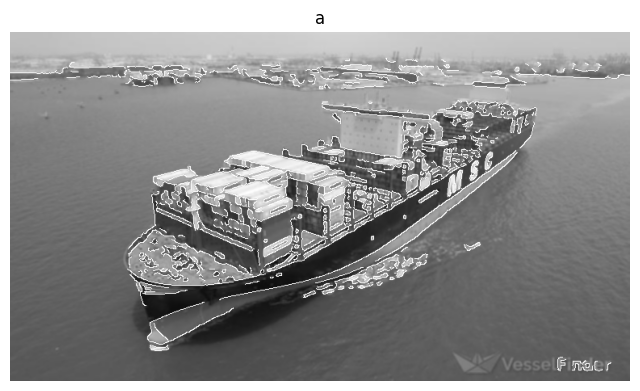

In [233]:
"""
Tipo de suavizado
    - 0 Suavizado leve
    - 1 Suavizado fuerte
    - 2 Suavizado Gaussiano leve 
    - 3 Suavizado Gaussiano fuerte
    
Tipo de deteccion de bordes
    - 0 Canny 
    - 1 Sobel 
    - 2 Prewitt
    - 3 Roberts
    
Color 
    - False  Se opera sobre las imagenes de en escala de grises
    - True  Se opera sobre las imagenes de en capas RGB
        
Tipo reconstruccion
    - 0 Se suman los bordes sobre la imagen original
    - 1 Se suman los bordes sobre la imagen con el suavizado seleccionado

"""


# El color no funciona
def pipeline_mejora(color = False,tipo_suavizado = 0, tipo_deteccion_bordes = 3,  tipo_reconstruccion = 1 ): 
    imagenes_rgb = [
    cv2.imread('barco1.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco2.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco3.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco4.jpg', cv2.IMREAD_COLOR),
    cv2.imread('barco5.jpg', cv2.IMREAD_COLOR)
    ]

    imagenes_grey = [
    cv2.imread('barco1.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco2.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco3.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco4.jpg',  cv2.IMREAD_GRAYSCALE),
    cv2.imread('barco5.jpg',  cv2.IMREAD_GRAYSCALE),
    ]
    imagenes = []
    # Controlar parametro color
    if (color):
        imagenes = imagenes_rgb 
    else:
        imagenes = imagenes_grey
        
    
    #Suavizar la imagenes 
    imagenes_s = []
    
    #Kernels disponibles 
    kernels_pasabaja = [
     np.ones((3, 3), dtype=np.float32) / 9,  # Kernel promedio simple 3x3
     np.ones((7, 7), dtype=np.float32) / 49,  # Kernel promedio 5x5 (más potente)
     cv2.getGaussianKernel(3, 1).dot(cv2.getGaussianKernel(3, 1).T),  # Gaussiano 3x3, sigma=1
     cv2.getGaussianKernel(5, 3).dot(cv2.getGaussianKernel(5, 3).T),  # Gaussiano 5x5, sigma=1.5
    ]
    
    if (tipo_suavizado < 0 or tipo_suavizado > len(kernels_pasabaja)-1): 
        print ("Tipo de suavizado incorrecto")
    else: 
        for img in imagenes: 
            imagenes_s.append(aplicar_filtro_pasabaja(imagen=img, kernel= kernels_pasabaja[tipo_suavizado]))
            
    
    imagen_b = []   
    #Detectar bordes
    match tipo_deteccion_bordes: 
        case 0: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_canny(img))
        case 1: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_sobel(img))
        case 2: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_sobel(img))
        case 3: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_prewitt(img))
        case 4: 
            for img in imagenes_s: 
                imagen_b.append(deteccion_roberts(img))
        case _: 
            print ("tipo de deteccion de bordes no valido")     
      
    
    imagen_mejorada = []
    match tipo_reconstruccion: 
        case 0: 
            for i in range(0,len(imagenes)): 
                imagen_mejorada.append(resaltar_bordes(imagenes[i], imagen_b[i]))      
        case 1: 
            for i in range(0,len(imagenes)): 
                imagen_mejorada.append(resaltar_bordes(imagenes_s[i], imagen_b[i]))             
                      
    return imagen_mejorada

imga = pipeline_mejora(tipo_deteccion_bordes=0)
mostrar_imagen(imga[0], "a")
    